<a href="https://colab.research.google.com/github/fungchenwx/Iris_Flower_Classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Iris Flower Classification project aims to build a machine learning model that can accurately predict the species of an iris flower based on its physical characteristics.
The project will take in the Iris dataset, which contains measurements of sepal length, sepal width, petal length, and petal width for three different iris species (Setosa, Versicolor, and Virginica).
The goal is to train a machine learning model, such as a decision tree or a support vector machine, to learn the relationships between these measurements and the corresponding iris species.
Once the model is trained, it can be used to predict the species of a new iris flower based on its measurements.

In [ ]:
# installing and importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Load the dataset

In [ ]:
# Load the Iris dataset
iris = load_iris()
# Features (sepal length, sepal width, petal length, petal width)
X = iris.data
# Target (species)
y = iris.target

View the Iris Flower dataset.

In [ ]:
# View the dataset information
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['species'] = iris.target

iris_df['species'] = iris_df['species'].map({0: iris.target_names[0],
                                           1: iris.target_names[1],
                                           2: iris.target_names[2]})
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Next, let's graph the data on a scatterplot with Matplotlib to visualize the data for its pattern.

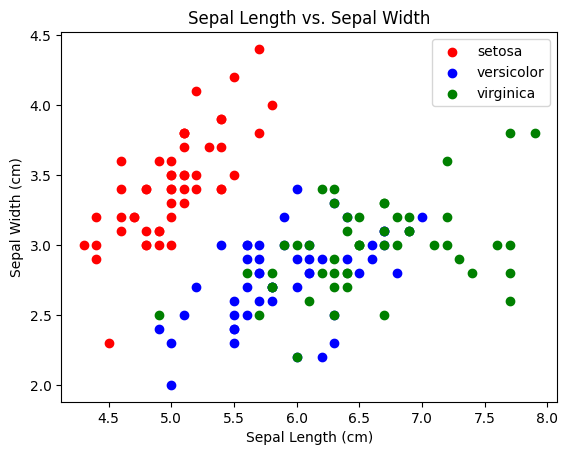

In [ ]:
# Create scatter plot to visualize data

colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}
for species, color in colors.items():
  plt.scatter(iris_df.loc[iris_df['species'] == species, 'sepal length (cm)'],
              iris_df.loc[iris_df['species'] == species, 'sepal width (cm)'],
              label=species,
              color=color)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs. Sepal Width')
plt.legend()
plt.show()

The cluster of points suggests that KNN classifier could be a decent choice as a classification model for this dataset.

In [ ]:
# Use kfolds to split data to ensure accuracy

kf = KFold(n_splits=5, shuffle=True, random_state=42)
KNN = KNeighborsClassifier(n_neighbors=5)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.9666666666666667
Accuracy: 0.9333333333333333
Accuracy: 0.9666666666666667


In [ ]:
# Predict on test data

y_pred_test = KNN.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9666666666666667


Based on the consistent cross-validation accuracy, there are no sign of overfitting.
Since both training and testing sets achieved high accuracies of around 96.67%, we can conclude that the model has successfully learned the underlying pattern within the dataset, and can make accurate predictions on new Iris flower datas.